In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df_1 = pd.read_csv('/content/cost-of-living.csv')

In [ ]:
df_1.head()

,city,country,x1,x2,x3,x4,x5,x6,x7,x8,...,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
0,Seoul,South Korea,7.68,53.78,6.15,3.07,4.99,3.93,1.48,0.79,...,110.36,742.54,557.52,2669.12,1731.08,22067.70,10971.90,2689.62,3.47,1
1,Shanghai,China,5.69,39.86,5.69,1.14,4.27,3.98,0.53,0.33,...,123.51,1091.93,569.88,2952.70,1561.59,17746.11,9416.35,1419.87,5.03,1
2,Guangzhou,China,4.13,28.47,4.98,0.85,1.71,3.54,0.44,0.33,...,43.89,533.28,317.45,1242.24,688.05,12892.82,5427.45,1211.68,5.19,1
3,Mumbai,India,3.68,18.42,3.68,2.46,4.30,2.48,0.48,0.19,...,41.17,522.40,294.05,1411.12,699.80,6092.45,2777.51,640.81,7.96,1
4,Delhi,India,4.91,22.11,4.30,1.84,3.68,1.77,0.49,0.19,...,36.50,229.84,135.31,601.02,329.15,2506.73,1036.74,586.46,8.06,1


In [ ]:
df_1.fillna(0, inplace = True)

In [ ]:
df_1.head()

,city,country,x1,x2,x3,x4,x5,x6,x7,x8,...,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
0,Seoul,South Korea,7.68,53.78,6.15,3.07,4.99,3.93,1.48,0.79,...,110.36,742.54,557.52,2669.12,1731.08,22067.70,10971.90,2689.62,3.47,1
1,Shanghai,China,5.69,39.86,5.69,1.14,4.27,3.98,0.53,0.33,...,123.51,1091.93,569.88,2952.70,1561.59,17746.11,9416.35,1419.87,5.03,1
2,Guangzhou,China,4.13,28.47,4.98,0.85,1.71,3.54,0.44,0.33,...,43.89,533.28,317.45,1242.24,688.05,12892.82,5427.45,1211.68,5.19,1
3,Mumbai,India,3.68,18.42,3.68,2.46,4.30,2.48,0.48,0.19,...,41.17,522.40,294.05,1411.12,699.80,6092.45,2777.51,640.81,7.96,1
4,Delhi,India,4.91,22.11,4.30,1.84,3.68,1.77,0.49,0.19,...,36.50,229.84,135.31,601.02,329.15,2506.73,1036.74,586.46,8.06,1


In [ ]:
def sum_graph(n):
  while n <=55:
    print(f"'x{n}', ", end = '  ')
    n+=1

In [ ]:
sum_graph(1)

'x1',   'x2',   'x3',   'x4',   'x5',   'x6',   'x7',   'x8',   'x9',   'x10',   'x11',   'x12',   'x13',   'x14',   'x15',   'x16',   'x17',   'x18',   'x19',   'x20',   'x21',   'x22',   'x23',   'x24',   'x25',   'x26',   'x27',   'x28',   'x29',   'x30',   'x31',   'x32',   'x33',   'x34',   'x35',   'x36',   'x37',   'x38',   'x39',   'x40',   'x41',   'x42',   'x43',   'x44',   'x45',   'x46',   'x47',   'x48',   'x49',   'x50',   'x51',   'x52',   'x53',   'x54',   'x55',   

In [ ]:
col_num = ['x1',   'x2',   'x3',   'x4',   'x5',   'x6',   'x7',   'x8',   'x9',   'x10',   'x11',   'x12',   'x13',   'x14',   'x15',   'x16',   'x17',   'x18',   'x19',   'x20',   'x21',   'x22',   'x23',   'x24',   'x25',   'x26',   'x27',   'x28',   'x29',   'x30',   'x31',   'x32',   'x33',   'x34',   'x35',   'x36',   'x37',   'x38',   'x39',   'x40',   'x41',   'x42',   'x43',   'x44',   'x45',   'x46',   'x47',   'x48',   'x49',   'x50',   'x51',   'x52',   'x53',   'x54',   'x55']

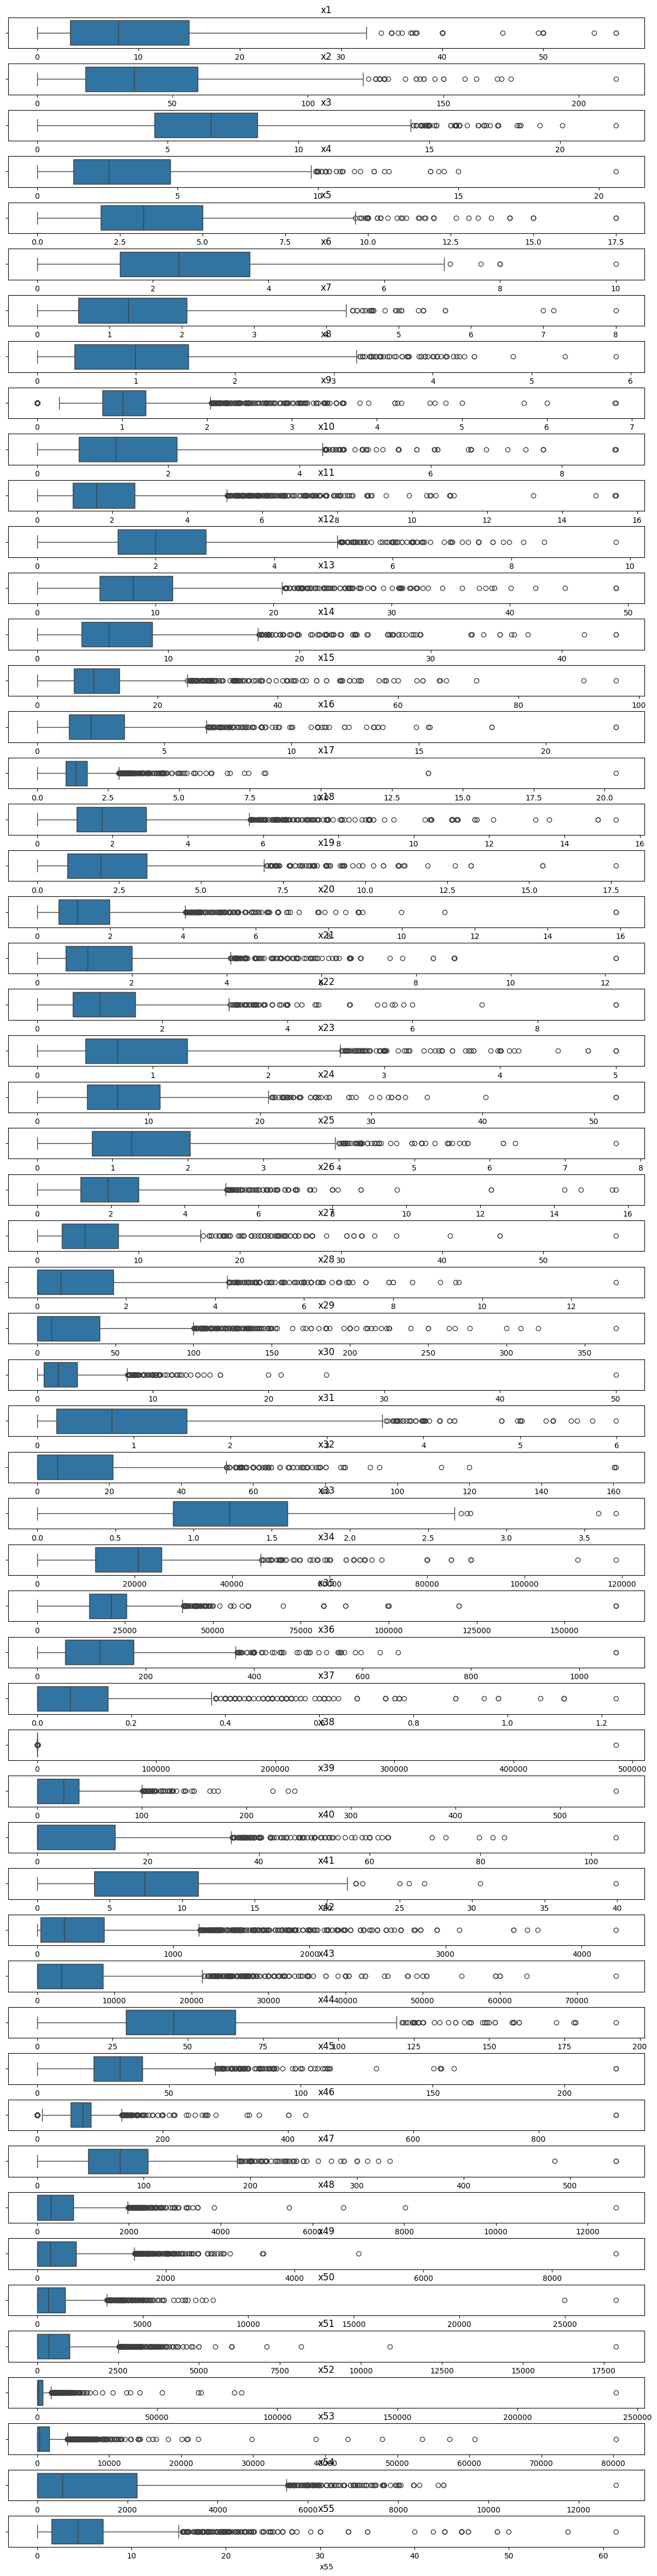

In [ ]:
fig, ax = plt.subplots(nrows=55, ncols=1, figsize=(15,60))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    sns.boxplot(x=col, data=df_1, ax=ax[i])
    ax[i].set_title(col)

In [ ]:
def del_outliers(df, columns):
    all_outliers = pd.DataFrame()

    for col in columns:
        seventy_fifth = df[col].quantile(0.75)
        twenty_fifth = df[col].quantile(0.25)
        iqr = seventy_fifth - twenty_fifth
        upper = seventy_fifth + (1.5 * iqr)
        lower = twenty_fifth - (1.5 * iqr)

        outliers_x = df[(df[col] < lower) | (df[col] > upper)]

        all_outliers = pd.concat([all_outliers, outliers_x])

        df = df[(df[col] >= lower) & (df[col] <= upper)]

    return df

In [ ]:
df_cleaned = del_outliers(df_1, ['x34', 'x35', 'x36', 'x38', 'x39', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52' ] )

In [ ]:
print('Total rows before the outliers cleaning: ', df_1.shape)
print('Total rows after the outliers cleaning: ', df_cleaned.shape)

Total rows before the outliers cleaning:  (4956, 58)
Total rows after the outliers cleaning:  (3909, 58)


In [ ]:
df_cleaned.to_csv('/content/cost-of-living_cleaning.csv')